<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_09/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This would be similar to your individual project but is smaller in scope. For example,
You can pick a dataset and explore it. Provide background, analysis and visualization. 
or you can pick a Python data visualization library (Altair, Bokeh, Plotly Express, Seaborn, etc.) or other libraries of your interest.  Learn and use it on a dataset. 
Make sure you make the project well styled and easy to follow. It does not need to be huge and long. Just good enough to show that you learn something new in a new dataset or learn something new in a new library.
I expect you to continue to find interesting datasets and Python libraries and try them in your leisure time. Create mini projects in GitHub as you learn and practice. 
Please submit the GitHub link to your assignment as usual.
Happy Thanksgiving!

1. What is your issue of interest (provide sufficient background information)?
- This assignment I'm looking at AirBnB data for Asheville, North Carolina. I'm specifically looking at type of accomodation, price, and reviews. 

2. What questions do you have in mind and would like to answer?
- I would like to know how reviews correlate to price and type of accomodation

3. Where do you get the data to help answer your questions?
- The data came from: http://insideairbnb.com/get-the-data.html 

4. What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units (observations) do you expect to analyze?
- The unit of analysis is 2099 AirBnB listings

5. What variables/measures do you plan to use in your analysis (variables should be tied to the questions in #3)?
- The variables used include: host_response_rate,	host_identity_verified,	room_type	bedrooms,	price	number_of_reviews,	review_scores_rating.

6. What kinds of techniques do you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?
- I plan to use summary statistics, scatter plots, and bar plots.

In [ ]:
# 1 - Import necessary libraries
import pandas as pd
import seaborn as sns
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
# read file into dataframe and show general information
df = pd.read_csv("listings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2099 non-null   int64  
 1   listing_url                                   2099 non-null   object 
 2   scrape_id                                     2099 non-null   int64  
 3   last_scraped                                  2099 non-null   object 
 4   name                                          2099 non-null   object 
 5   description                                   2094 non-null   object 
 6   neighborhood_overview                         1703 non-null   object 
 7   picture_url                                   2099 non-null   object 
 8   host_id                                       2099 non-null   int64  
 9   host_url                                      2099 non-null   o

In [ ]:
# Select only named columns
df = pd.DataFrame(df,columns=['host_response_rate','host_identity_verified','room_type', 'bedrooms','price','number_of_reviews','review_scores_rating'])
df.head()

,host_response_rate,host_identity_verified,room_type,bedrooms,price,number_of_reviews,review_scores_rating
0,83%,t,Entire home/apt,1.0,$80.00,89,90.0
1,98%,t,Entire home/apt,1.0,$93.00,271,91.0
2,98%,t,Shared room,1.0,$30.00,280,94.0
3,0%,f,Private room,1.0,$125.00,58,99.0
4,100%,t,Entire home/apt,1.0,$134.00,56,97.0


In [ ]:
# General info for selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_rate      1974 non-null   object 
 1   host_identity_verified  2099 non-null   object 
 2   room_type               2099 non-null   object 
 3   bedrooms                1944 non-null   float64
 4   price                   2099 non-null   object 
 5   number_of_reviews       2099 non-null   int64  
 6   review_scores_rating    1979 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 114.9+ KB


In [ ]:
# count how many null values in each column
df.isnull().sum()

host_response_rate        125
host_identity_verified      0
room_type                   0
bedrooms                  155
price                       0
number_of_reviews           0
review_scores_rating      120
dtype: int64

In [ ]:
# drup null values and display new info
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 0 to 2087
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_rate      1719 non-null   object 
 1   host_identity_verified  1719 non-null   object 
 2   room_type               1719 non-null   object 
 3   bedrooms                1719 non-null   float64
 4   price                   1719 non-null   object 
 5   number_of_reviews       1719 non-null   int64  
 6   review_scores_rating    1719 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 107.4+ KB


In [ ]:
# General statistics
df.describe()

,bedrooms,number_of_reviews,review_scores_rating
count,1719.000000,1719.000000,1719.000000
mean,1.762653,84.965096,97.690518
std,1.054168,103.194505,3.104257
min,1.000000,1.000000,67.000000
25%,1.000000,15.000000,97.000000
50%,1.000000,48.000000,99.000000
75%,2.000000,118.000000,100.000000
max,8.000000,976.000000,100.000000


In [ ]:
# finds and displays the average number of bedrooms offered
mean_bedrooms = np.mean(df['bedrooms'])
mean_bedrooms

1.762652705061082

In [ ]:
# replace unnecessary characters in the price column
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [ ]:
# new describe since I tool out the extra characters
df.describe()

,bedrooms,price,number_of_reviews,review_scores_rating
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,1.762653,165.467202,84.965096,97.690518
std,1.054168,128.489701,103.194505,3.104257
min,1.000000,21.000000,1.000000,67.000000
25%,1.000000,86.000000,15.000000,97.000000
50%,1.000000,126.000000,48.000000,99.000000
75%,2.000000,206.000000,118.000000,100.000000
max,8.000000,1335.000000,976.000000,100.000000


In [ ]:
# price minimum
df['price'].min()

21.0

In [ ]:
# price maximum
df['price'].max()

1335.0

In [ ]:
# price average
mean_price = np.mean(df['price'])
mean_price

165.4672018615474

In [ ]:
# function to sample 100 prices, find the mean, and find the difference between the sample and population means
def mean_fun(x,y):
    mean_sample = np.mean((y.sample(100)))
    mean_total = np.mean(df['price'])
    mean_diff = mean_total - mean_sample
    return mean_diff

In [ ]:
# passes arguments to the above function
mean_fun(100,df['price'])

21.008701861547394

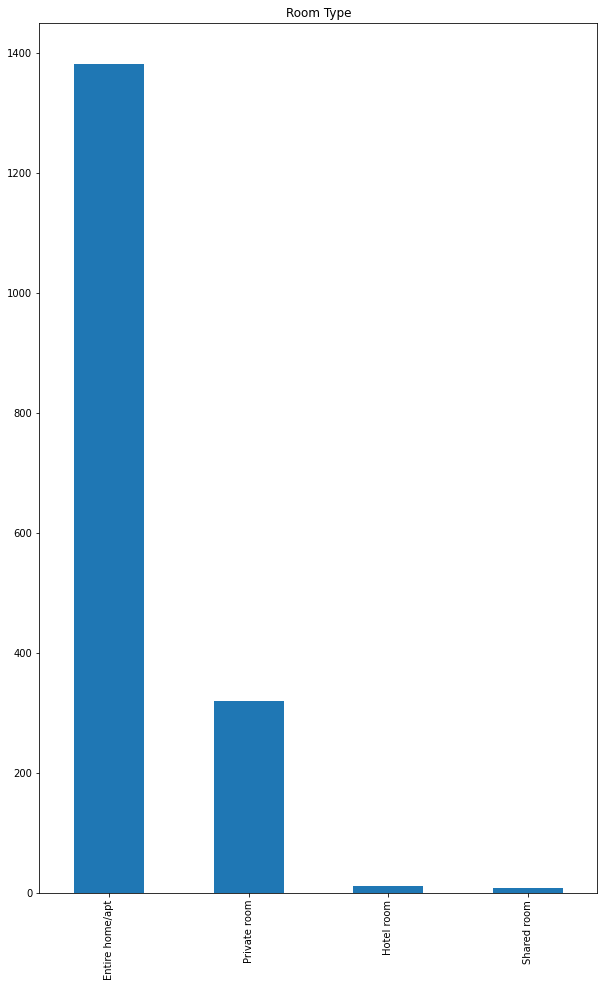

In [ ]:
# graph to show the number of observations per room type
df['room_type'].value_counts().plot(kind='bar', title='Observations Per Room Type', figsize=(10,16))  
plt.show()

In [ ]:
# minimum number of reviews
df['number_of_reviews'].min()

1

In [ ]:
# max number of reviews 
df['number_of_reviews'].max()

976

In [ ]:
# average number of reviews 
mean_reviews = np.mean(df['number_of_reviews'])
mean_reviews

84.96509598603839

In [ ]:
# New dataframe with sample size of 100 to show up on graph
df1 = df.sample(100)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


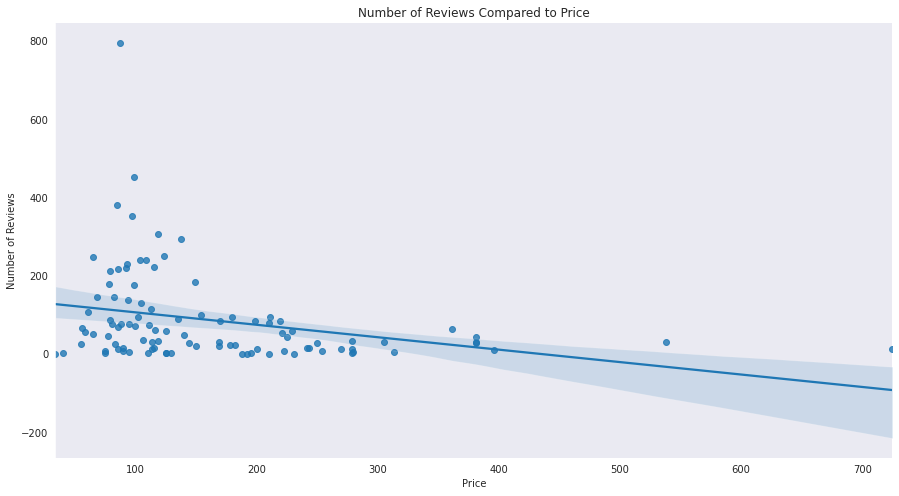

In [ ]:
# regression line scatter plot to show correlation between price and number of reviews
sns.set_style('dark')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.regplot(df1['price'], df1['number_of_reviews'], ax=ax)
sns.despine()
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Compared to Price")
plt.show()

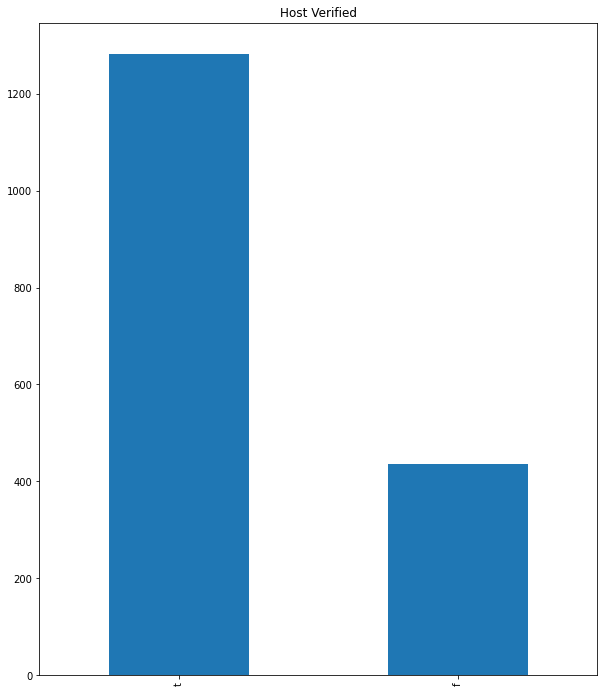

In [ ]:
# graph to show number of hosts who have been verified
df['host_identity_verified'].value_counts().plot(kind='bar', title='Host Verified', figsize=(10,12))  
plt.show()

In [ ]:
# minumum rating
df['review_scores_rating'].min()

67.0

In [ ]:
# maximum rating
df['review_scores_rating'].max()

100.0

In [ ]:
# average rating
mean_review_score = np.mean(df['review_scores_rating'])
mean_review_score

97.69051774287377

In [ ]:
# chart to show the rating compared to price color coded by type of accomodation
alt.Chart(df).mark_point().encode(
    x = alt.X('review_scores_rating', scale=alt.Scale(domain=[65, 110])),
    y = alt.Y('price', scale=alt.Scale(domain=[19, 1400])),color='room_type').properties(width=600,height=500)

alt.Chart(...)

### Conclusions
- The more expensive room options are those for an entire house or apartment.
- The majority of accomodations are between 50 and 300 dollars per night.
- I was expecting higher priced locations to have better reviews but that was not always the case
- Altair seems to be the most fun visualization so far but that might just be because i found better examples when I googled stuff. 
- The price outlyers are generally for whole houses/apartments or hotel rooms.